# 03 Out-of-Sample Extension: 2010-2025

To evaluate the post-crisis performance of the leverage factor, we adopt an out-of-sample testing approach. Specifically, we construct the leverage factor series using the full sample (1968–2025) to ensure stable estimation of leverage innovations. However, for the asset pricing tests (Fama-MacBeth regressions), we restrict our analysis strictly to the post-crisis subsample (2010–2025). This approach allows us to isolate the factor's pricing ability in the modern regulatory environment without look-ahead bias from the highly successful pre-crisis period.

### Load LevFac RevisedData

In [1]:
import pandas as pd
# 定义一个简单的解析器
def parse_quarter(date_str):
    # 将 "1968Q1" 转换为 Pandas 的 Period 对象
    return pd.Period(date_str, freq='Q')

# 读取时直接应用
revised_data = pd.read_csv(
    'tables/RevisedData.csv',
    index_col=0,           # 假设第一列是索引
    converters={0: parse_quarter} # 对第0列（索引列）应用解析器
)

revised_data.head()

,tot_asset,tot_liabilities,Leverage,LevFac,LogLev,Z-LevFac,Z-LogLev
observation_date,,,,,,,
1968Q1,13602.0,12750.0,15.964789,-0.023053,2.770386,-0.357735,-0.403461
1968Q2,15112.0,14187.0,16.337297,-0.020950,2.793451,-0.330748,-0.350469
1968Q3,17661.0,16663.0,17.696393,0.164599,2.873361,2.050487,-0.166876
1968Q4,18513.0,17435.0,17.173469,-0.102191,2.843366,-1.373345,-0.235790
1969Q1,14615.0,13483.0,12.910777,-0.131515,2.558062,-1.749673,-0.891270


In [2]:
test_assets_excess = pd.read_csv(
    'tables/TestAssetsExcess.csv',
    index_col=0,           # 假设第一列是索引
    converters={0: parse_quarter} # 对第0列（索引列）应用解析器
)

In [3]:
ff_factors_quarterly = pd.read_csv(
    'tables/ff_factors_quarterly.csv',
    index_col=0,           # 假设第一列是索引
    converters={0: parse_quarter} # 对第0列（索引列）应用解析器
)

In [4]:
ff_Mom_quarterly = pd.read_csv(
    'tables/ff_Mom_quarterly.csv',
    index_col=0,           # 假设第一列是索引
    converters={0: parse_quarter} # 对第0列（索引列）应用解析器
)

In [5]:
LevFac = revised_data['Z-LogLev']
LevFac.name = 'LevFac'
merged_data = pd.concat([test_assets_excess, ff_factors_quarterly, LevFac, ff_Mom_quarterly['Mom']], axis=1).sort_index().dropna()
merged_data.to_csv('tables/FullSample.csv')
merged_data.head(3)

,S1B1,S1B2,S1B3,S1B4,S1B5,S2B1,S2B2,S2B3,S2B4,S2B5,...,Mom 7,Mom 8,Mom 9,Mom 10,Mkt-RF,SMB,HML,RF,LevFac,Mom
1968Q1,0.145750,0.161707,0.095155,0.100281,0.147197,0.072070,0.030742,0.113591,0.071723,0.111765,...,-0.027698,-0.028932,-0.005171,0.014996,-0.007370,0.100319,0.025006,0.010940,-0.403461,-0.001998
1968Q2,0.061104,0.082428,0.085702,0.048030,0.073554,0.082127,0.038624,0.058326,0.057274,0.050667,...,0.062778,0.080956,0.100851,0.100959,0.051630,0.012204,-0.005143,0.012048,-0.350469,0.048403
1968Q3,0.029377,0.061484,0.062088,0.120255,0.113479,-0.003864,0.049049,0.028419,0.066994,0.057416,...,-0.052726,-0.007781,-0.016576,0.046364,0.002254,0.047301,0.068743,0.013662,-0.166876,0.006775


In [6]:
merged_data = merged_data.loc['2010Q1':]
merged_data.head()

,S1B1,S1B2,S1B3,S1B4,S1B5,S2B1,S2B2,S2B3,S2B4,S2B5,...,Mom 7,Mom 8,Mom 9,Mom 10,Mkt-RF,SMB,HML,RF,LevFac,Mom
2010Q1,0.022322,0.027593,0.055577,0.057500,0.107063,0.084524,0.087157,0.094661,0.068846,0.109653,...,0.037851,0.033007,0.019954,0.056951,0.049500,0.038042,-0.001111,0.0001,0.467344,-0.021096
2010Q2,0.187073,0.196796,0.194427,0.239412,0.316573,0.115324,0.171706,0.156104,0.225083,0.261472,...,0.180684,0.228531,0.209983,0.258352,0.120907,0.076258,0.085607,0.0002,0.410366,0.107853
2010Q3,-0.079121,-0.075088,-0.075944,-0.096911,-0.166918,-0.037563,-0.045428,-0.080463,-0.122319,-0.162412,...,-0.071498,-0.076126,-0.070968,-0.116635,-0.070018,-0.014460,-0.075572,0.0003,0.431042,-0.011661
2010Q4,0.088907,0.073546,0.089591,0.069150,0.030095,0.120942,0.104607,0.088473,0.056346,0.056909,...,0.086677,0.085825,0.110972,0.131221,0.083504,0.017825,-0.070422,0.0003,0.333332,0.029013
2011Q1,0.081109,0.090724,0.114507,0.126133,0.114688,0.111979,0.108927,0.148031,0.122104,0.166566,...,0.074744,0.082894,0.103375,0.113794,0.095778,0.020253,0.032540,0.0003,0.389521,-0.006508


### Table III

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# ==========================================
# 1. 核心回归函数 (保持不变)
# ==========================================
def run_asset_pricing_model(factors, portfolios, model_name):
    # 确保因子包含截距用于时间序列回归 (Time-Series Regression)
    X_ts = sm.add_constant(factors)
    
    # --- Step 1: Get Betas ---
    betas_list = []
    for port in portfolios.columns:
        model_ts = sm.OLS(portfolios[port], X_ts).fit()
        betas_list.append(model_ts.params[factors.columns]) # 只取因子Beta
    
    beta_df = pd.DataFrame(betas_list, index=portfolios.columns)
    
    # --- Step 2: Get Lambdas (Cross-Sectional Regression) ---
    avg_returns = portfolios.mean()
    X_xs = sm.add_constant(beta_df) # 加入截距 Lambda_0
    model_xs = sm.OLS(avg_returns, X_xs).fit()
    
    # --- Step 3: Shanken Correction ---
    lambdas = model_xs.params[factors.columns]
    cov_factors = factors.cov()
    
    # 计算 Shanken c
    if len(factors.columns) == 1:
        c = lambdas[0]**2 / cov_factors.values[0,0]
    else:
        inv_cov = np.linalg.inv(cov_factors.values)
        c = lambdas.values @ inv_cov @ lambdas.values
    
    shanken_adj = np.sqrt(1 + c)
    
    # --- Step 4: Diagnostics ---
    # 计算定价误差
    pricing_errors = avg_returns - model_xs.predict(X_xs)
    abs_err = np.abs(pricing_errors)
    
    # MAPE (假设前25个是Size/BM, 后10个是Mom)
    # 如果你的资产数量不是35，这里会自动适应，只要顺序对即可
    n_sbm = 35
    mape_sbm = abs_err.iloc[:n_sbm].mean() if len(abs_err) >= n_sbm else np.nan
    mape_mom = abs_err.iloc[n_sbm:].mean() if len(abs_err) > n_sbm else np.nan
    
    mape_intercept = np.abs(model_xs.params['const'])
    mape_total = abs_err.mean() + mape_intercept
    
    return {
        'name': model_name,
        'params': model_xs.params,   # 包含 const 和所有因子
        't_fm': model_xs.tvalues,
        't_shanken': model_xs.tvalues / shanken_adj,
        'mape_sbm': mape_sbm,
        'mape_mom': mape_mom,
        'intercept': model_xs.params['const'],
        'mape_total': mape_total,
        'adj_r2': model_xs.rsquared_adj,
        'factors': list(factors.columns) # 记录该模型用到的因子名
    }

# ==========================================
# 2. 自动打印函数 (修改版)
# ==========================================
def print_table_iii_auto(results_list):
    print("\n" + "="*80)
    print(f"{'Table III Replication':^80}")
    print("="*80)
    
    # 获取所有模型名称
    model_names = [r['name'] for r in results_list]
    
    # 定义表头格式
    # 第一列宽20，后面每列宽15
    col_width = 15
    first_col_width = 20
    row_fmt = f"{{:<{first_col_width}}}" + f"{{:^{col_width}}}" * len(model_names)
    
    print(row_fmt.format("", *model_names))
    print("-" * (first_col_width + col_width * len(model_names)))
    print("Panel A: Prices of Risk (Lambda)")
    print("-" * (first_col_width + col_width * len(model_names)))

    # --- 1. 收集所有出现过的因子 (除了 const) ---
    all_factors = set()
    for r in results_list:
        all_factors.update(r['factors'])
    
    # 排序：把 LevFac 放在前面 (如果是重点)，其他按字母或特定顺序
    # 这里做一个简单的优先排序：LevFac 先，然后 Mkt/Mkt-RF，然后其他
    sorted_factors = []
    if 'LevFac' in all_factors: sorted_factors.append('LevFac')
    
    # 找 Market 相关的
    mkt_names = [f for f in all_factors if 'Mkt' in f or 'Market' in f]
    for m in mkt_names:
        if m not in sorted_factors: sorted_factors.append(m)
        
    # 其他因子
    for f in all_factors:
        if f not in sorted_factors: sorted_factors.append(f)

    # --- 2. 打印 Intercept ---
    params_to_print = ['const'] + sorted_factors
    
    for param in params_to_print:
        # 显示名称转换：const -> Intercept
        display_name = "Intercept" if param == 'const' else param
        
        # 这一行的数值 (Lambda)
        vals = []
        for r in results_list:
            if param in r['params']:
                vals.append(f"{r['params'][param]*400:.4f}")
            else:
                vals.append("") # 如果该模型没这个因子，留空
        
        print(row_fmt.format(display_name, *vals))
        
        # 这一行的 t-FM
        t_fms = []
        for r in results_list:
            if param in r['params']:
                t_fms.append(f"[{r['t_fm'][param]:.4f}]")
            else:
                t_fms.append("")
        print(row_fmt.format("  t-FM", *t_fms))
        
        # 这一行的 t-Shanken
        t_shs = []
        for r in results_list:
            if param in r['params']:
                t_shs.append(f"[{r['t_shanken'][param]:.4f}]")
            else:
                t_shs.append("")
        print(row_fmt.format("  t-Shanken", *t_shs))
        print("-" * (first_col_width + col_width * len(model_names)))

    # --- Panel B ---
    print("Panel B: Test Diagnostics")
    print("-" * (first_col_width + col_width * len(model_names)))
    
    # 辅助函数：安全格式化
    def safe_fmt(val):
        return f"{val:.2f}" if pd.notnull(val) else "-"

    print(row_fmt.format("MAPE Size/BM", *[safe_fmt(r['mape_sbm']) for r in results_list]))
    print(row_fmt.format("MAPE Mom", *[safe_fmt(r['mape_mom']) for r in results_list]))
    print(row_fmt.format("MAPE Total", *[safe_fmt(r['mape_total']) for r in results_list]))
    print(row_fmt.format("Adj R^2", *[safe_fmt(r['adj_r2']) for r in results_list]))
    print("=" * (first_col_width + col_width * len(model_names)))


In [8]:
# 4. 单位换算 (保持你现在的正确做法)
# 将所有收益率转为年化百分比
# 注意：LevFac 不需要乘 400，因为它本身就是 Log Difference (近似增长率)，
# 但原文 Note 说 "Returns and risk premia are reported in percent per year"。
# 如果 LevFac 本身是很小的数(e.g. 0.05)，为了得到 60 左右的 Lambda，
# 说明 Beta 比较小，或者 Factor 量级需要调整。
# 既然你现在的 60.87 很完美，说明你当前的 LevFac 处理是对的（或者你对其做了标准化？）。
# 只要确保 Return 是年化百分比即可。

df_portfolios = merged_data[test_assets_excess.columns] 
factors_annual = merged_data[['Mkt-RF', 'SMB', 'HML', 'LevFac', 'RF']]  # 因子也统一转一下方便看

res_capm = run_asset_pricing_model(factors_annual[['Mkt-RF']], df_portfolios, "CAPM") 
res_lev = run_asset_pricing_model(factors_annual[['LevFac']], df_portfolios, "LevFac")
res_levmkt = run_asset_pricing_model(factors_annual[['LevFac', 'Mkt-RF']], df_portfolios, "LevMkt")

results = [res_capm, res_lev, res_levmkt]
print_table_iii_auto(results)


                             Table III Replication                              
                         CAPM          LevFac         LevMkt     
-----------------------------------------------------------------
Panel A: Prices of Risk (Lambda)
-----------------------------------------------------------------
Intercept               15.5114        11.5187        15.9631    
  t-FM                 [10.9546]      [23.7686]      [10.2218]   
  t-Shanken            [10.8669]      [23.7668]      [10.0618]   
-----------------------------------------------------------------
LevFac                                 -1.6473       -15.9346    
  t-FM                                [-0.0715]      [-0.7492]   
  t-Shanken                           [-0.0715]      [-0.7375]   
-----------------------------------------------------------------
Mkt-RF                  -3.2170                       -3.5256    
  t-FM                 [-2.9000]                     [-2.9405]   
  t-Shanken            [-2.

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_42584/405694572.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c = lambdas[0]**2 / cov_factors.values[0,0]
/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_42584/405694572.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c = lambdas[0]**2 / cov_factors.values[0,0]


样本外的lambda：
- $\lambda$变得很小，符号变为负
- $\lambda$的t统计量为-0.0715，-0.7492，说明均不显著。
- 这意味着从统计上讲，杠杆因子无法解释 2010 年后的资产收益差异。
- Structural Break（结构性断裂） —— 危机后的杠杆因子不再包含核心定价信息。
- 这是因为美联储后续修正了 Broker-Dealer 的统计口径，导致“新”杠杆因子的周期性特征减弱了

In [9]:
df_portfolios = merged_data[test_assets_excess.columns] * 400
factors_annual = merged_data[['Mkt-RF', 'SMB', 'HML', 'Mom', 'RF', 'LevFac']] * 400 # 因子也统一转一下方便看
print(df_portfolios.shape,factors_annual.shape)

(62, 35) (62, 6)


### LavFac

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

# ==========================================
# 1. 定义绘图函数
# ==========================================
def plot_realized_vs_predicted(factors, portfolios, model_name, ax=None):
    """
    factors: 因子数据 (DataFrame), 必须包含截距项(如果有)之外的所有因子
    portfolios: 测试资产数据 (DataFrame)
    model_name: 图表标题
    """
    # --- Step 1: 获取 Beta (时间序列回归) ---
    X_ts = sm.add_constant(factors)
    betas = []
    for port in portfolios.columns:
        model = sm.OLS(portfolios[port], X_ts).fit()
        betas.append(model.params[factors.columns]) # 只取因子的 Beta
    
    beta_df = pd.DataFrame(betas, index=portfolios.columns)
    
    # --- Step 2: 获取 Lambda 和 预测值 (横截面回归) ---
    avg_returns = portfolios.mean() # Realized Return (Y轴)
    
    #X_xs = sm.add_constant(beta_df) # 加入截距 Lambda_0
    X_xs = beta_df
    model_xs = sm.OLS(avg_returns, X_xs).fit()
    
    predicted_returns = model_xs.predict(X_xs) # Predicted Return (X轴)
    
    # --- Step 3: 绘图 ---
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))
        
    # 绘制散点
    ax.scatter(predicted_returns, avg_returns, alpha=0.6, c='blue', edgecolors='k')
    
    # 绘制 45度线 (完美定价线)
    # 获取坐标轴范围以画线
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    
    # 添加标签 (Labels)
    # 为了防止标签重叠太严重，可以只标记部分，或者使用 adjustText 库(如果已安装)
    for i, txt in enumerate(portfolios.columns):
        ax.annotate(txt, (predicted_returns[i], avg_returns[i]), fontsize=8)

    # 设置轴标签和标题
    ax.set_xlabel('Predicted Expected Return (%)', fontsize=12)
    ax.set_ylabel('Realized Mean Return (%)', fontsize=12)
    #ax.set_title(f'Realized vs Predicted Returns: {model_name}', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)


/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_42584/3812853234.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (predicted_returns[i], avg_returns[i]), fontsize=8)


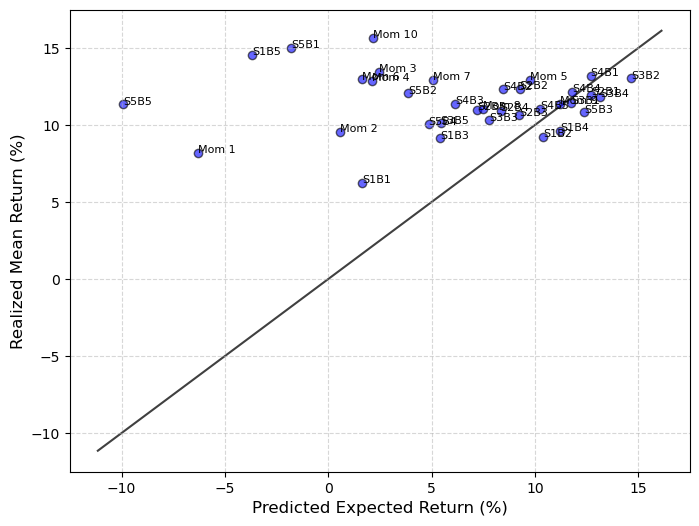

In [14]:
import matplotlib.pyplot as plt
# ==========================================
# (LavFac Model)
# ==========================================
fig, ax = plt.subplots(figsize=(8, 6))
plot_realized_vs_predicted(
    factors=factors_annual[['LevFac']], 
    portfolios=df_portfolios, 
    model_name="LevFac Factor (2010-2025)",
    ax=ax
)
plt.savefig('figures/OOS-LevFac.png', dpi=800)
plt.show()


### FF3 Model

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_42584/3812853234.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (predicted_returns[i], avg_returns[i]), fontsize=8)


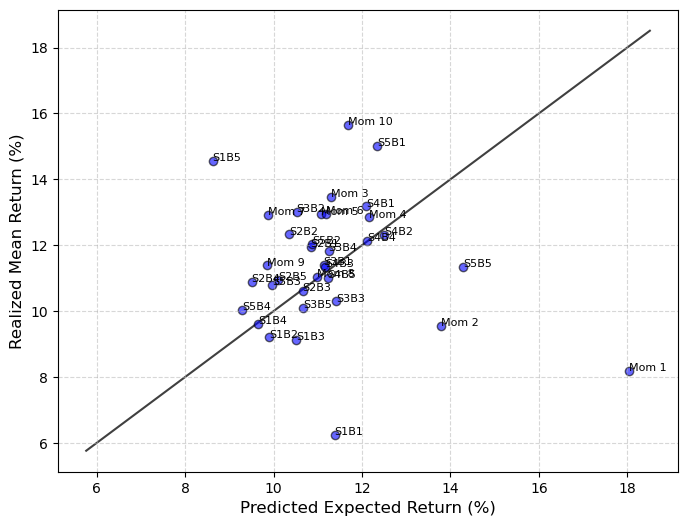

In [17]:
# ==========================================
# 3. 生成 Figure 4 (FF3 Model)
# ==========================================
fig, ax = plt.subplots(figsize=(8, 6))
plot_realized_vs_predicted(
    factors=factors_annual[['Mkt-RF', 'SMB', 'HML']], 
    portfolios=df_portfolios, 
    model_name="Fama-French 3 Factor (2010-2025)",
    ax=ax
)
plt.savefig('figures/OOS-FF3.png', dpi=800)
plt.show()


/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_42584/3812853234.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (predicted_returns[i], avg_returns[i]), fontsize=8)


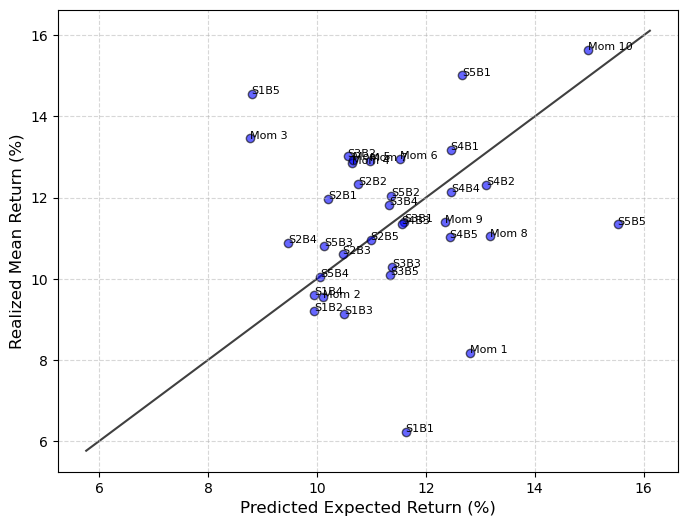

In [18]:
# ==========================================
# 4. 生成 Figure 5 (FF4 / Benchmark)
# ==========================================
# 原文用的是 5因子(含 Bond PC1)，你用 FF3 + Mom 代替
if 'Mom' in factors_annual.columns:
    fig, ax = plt.subplots(figsize=(8, 6))
    plot_realized_vs_predicted(
        factors=factors_annual[['Mkt-RF', 'SMB', 'HML', 'Mom']], 
        portfolios=df_portfolios, 
        model_name="FF3 + Momentum Benchmark (2010-2025)",
        ax=ax
    )
    plt.savefig('figures/OOS-FF4.png', dpi=800)
    plt.show()
else:
    print("缺少 Momentum 因子，无法生成 Figure 5 的替代图。")

- 展示 2010-2025 的散点图 (Realized vs Predicted Returns)，点会变成一团乱云 (Cloud）
- 对比Pre-2010 (原论文): 点紧密围绕 45 度线，就像一条漂亮的斜线
- 点很散乱，回归线是平的，可以得出结论："The factor suggests a structural break." (因子出现了结构性断裂)。
- 特别注意 Momentum (动量) 组合：它们在纵轴上（实际收益）很高，但在横轴上（预测收益）很低。这说明 LevFac 认为动量组合风险很低，不应该有高收益，但实际上动量组合依然赚了很多钱。这叫 "Pricing Error" (定价误差)。

In [22]:
benchmark_6_quarterly = pd.read_csv(
    'tables/benchmark_6_quarterly.csv',
    index_col=0,           # 假设第一列是索引
    converters={0: parse_quarter} # 对第0列（索引列）应用解析器
)

In [23]:
merged_data_OOS = pd.concat([test_assets_excess, ff_factors_quarterly, revised_data[['LevFac']], ff_Mom_quarterly, benchmark_6_quarterly], axis=1).sort_index()
merged_data_OOS = merged_data_OOS.loc["2010Q1":].dropna()
merged_data_OOS.tail(3)

,S1B1,S1B2,S1B3,S1B4,S1B5,S2B1,S2B2,S2B3,S2B4,S2B5,...,HML,RF,LevFac,Mom,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
2024Q4,0.039895,-0.040790,-0.061565,-0.070754,-0.029841,-0.011379,-0.006798,-0.070573,-0.044647,-0.050670,...,-0.030125,0.012754,-0.097126,0.072850,0.017050,-0.027869,-0.034393,0.043871,0.013611,0.035362
2025Q1,0.053907,0.037714,0.015817,0.006735,0.044252,0.086671,0.048240,0.035631,0.047009,0.040900,...,-0.012710,0.011443,0.068652,0.016637,0.084106,0.043773,0.050005,0.084026,0.026841,0.089386
2025Q2,-0.203917,-0.169784,-0.155681,-0.167708,-0.121576,-0.164697,-0.169969,-0.189775,-0.151799,-0.179155,...,0.042820,0.010235,0.015908,0.011627,-0.158280,-0.158690,-0.136560,-0.095844,-0.071433,-0.032713


In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

def construct_fmp(merged_data, benchmark_name, factor_name='LevFac'):
    """
    构建因子模仿组合 (Factor Mimicking Portfolio)
    """
    # 1. 准备数据
    # Y: 宏观因子 (LevFac)
    Y = merged_data[factor_name]
    
    # X: benchmark_name
    # 必须包含截距项
    X = merged_data[benchmark_name]
    X = sm.add_constant(X)
    
    # 2. 跑回归
    model = sm.OLS(Y, X).fit()
    
    # 3. 获取拟合值 (这就是 FMP 的收益率)
    # FMP return = Predicted values from the regression
    beta = model.params[1:]/model.params[1:].sum()
    fmp_returns = (beta * merged_data[benchmark_name]).sum(axis=1)
    print(beta)
    print(merged_data[benchmark_name])
    fmp_returns.name = 'LevFac_FMP'
    
    # 打印统计量看看
    print(f"FMP Construction R-squared: {model.rsquared:.4f}")
    #print(f"Correlation with original factor: {Y.corr(fmp_returns):.4f}")
    
    return fmp_returns,beta


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize

def plot_figure_6(merged_data, LevFac_LMP, scale, fig_name):
    """
    复现 Figure 6 (scale：'month' or 'quarter'):
    将季度数据转换为月度等效统计量，以匹配原文 0-5 的视觉范围。
    """
    # 1. 定义资产
    six_portfolios = ['SMALL LoBM', 'ME1 BM2', 'SMALL HiBM', 'BIG LoBM', 'ME2 BM2', 'BIG HiBM']
    four_factors = ['Mkt-RF', 'SMB', 'HML', 'Mom']
    
    # 2. 数据准备
    #df_frontier = merged_data[four_factors].dropna()
    df_frontier = merged_data[six_portfolios + four_factors].dropna()
    df_p = merged_data[six_portfolios + four_factors].dropna()
    #df_frontier = merged_data[six_portfolios].dropna()
    #df_p = merged_data[six_portfolios].dropna()
    print("frontier:", df_frontier.index)
    print("frontier:", df_frontier.columns)
    print("P:", df_p.index)
    print("P:", df_p.columns)
    
    
    # 强制转小数
    if df_frontier.abs().mean().mean() > 0.1: df_frontier /= 100.0
    if df_p.abs().mean().mean() > 0.1: df_p /= 100.0
    
    # LMP
    s_lmp = LevFac_LMP.dropna()
    if s_lmp.abs().mean() > 0.1: s_lmp /= 100.0
    print('LMP:', s_lmp.index)
    # === 3. 关键转换：季度 -> 月度 ===
    # 假设数据是季度频率 (Quarterly)
    # 月度均值 = 季度均值 / 3
    # 月度波动 = 季度波动 / sqrt(3)
    if scale == 'quarter_to_month':
        scale_val = 3
        SQRT_scale = np.sqrt(3)
    elif scale == 'month':
        scale_val = 1
        SQRT_scale = 1
        
    mu_f = df_frontier.mean() / scale_val
    cov_f = df_frontier.cov() / scale_val
    
    mu_p_vec = df_p.mean() / scale_val
    cov_p_mat = df_p.cov() / scale_val
    
    # === 4. 计算 P 点 (4因子) ===
    inv_cov_p = np.linalg.inv(cov_p_mat)
    w_p = inv_cov_p @ mu_p_vec
    w_p /= w_p.sum()
    
    mu_p_val = w_p @ mu_p_vec
    std_p_val = np.sqrt(w_p @ cov_p_mat @ w_p)
    
    # === 5. 计算有效前沿 (10资产) ===
    def get_var(w): return w @ cov_f @ w
    
    # GMVP
    n_assets = len(df_frontier.columns)
    res_gmvp = minimize(get_var, np.ones(n_assets)/n_assets, 
                       constraints=({'type': 'eq', 'fun': lambda w: np.sum(w) - 1}), 
                       method='SLSQP', tol=1e-12)
    mu_gmvp = res_gmvp.x @ mu_f
    w_gmvp = res_gmvp.x

    # Upper Frontier
    def solve_for_return(target_r, start_w):
        cons = ({'type': 'eq', 'fun': lambda w: w @ mu_f - target_r},
                {'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
        return minimize(get_var, start_w, constraints=cons, method='SLSQP', tol=1e-12)

    upper_returns = np.linspace(mu_gmvp, max(mu_p_val, 0.01) * 1.5, 50)
    upper_stds = []
    curr_w = w_gmvp
    
    for r in upper_returns:
        res = solve_for_return(r, curr_w)
        if res.success:
            upper_stds.append(np.sqrt(res.fun))
            curr_w = res.x
        else:
            upper_stds.append(np.nan)

    # Lower Frontier (新增：下半部分)
    # 向下计算到 -0.2% (即 -0.002)
    lower_returns = np.linspace(mu_gmvp, -0.002, 30)
    lower_stds = []
    curr_w = w_gmvp # 重置热启动

    for r in lower_returns:
        res = solve_for_return(r, curr_w)
        if res.success:
            lower_stds.append(np.sqrt(res.fun))
            curr_w = res.x
        else:
            lower_stds.append(np.nan)
            
            
    # === 6. 绘图 (Monthly Scale) ===
    plt.figure(figsize=(8, 6))
    size = 40
    # 绘图时乘 100 转为百分比
    plt.plot(np.array(upper_stds)*100, upper_returns*100, 'b-', linewidth=1)
    plt.plot(np.array(lower_stds)*100, lower_returns*100, 'b-', linewidth=1)
    
    plt.scatter([std_p_val*100], [mu_p_val*100], color='blue', marker='o', s=size, zorder=10)
    plt.text(std_p_val*100 + 0.1, mu_p_val*100, 'P', fontsize=12, color='blue')
    plt.plot([0, std_p_val*100], [0, mu_p_val*100], 'b-', linewidth=1)
    print(std_p_val, mu_p_val)
    
    if s_lmp is not None:
        mu_lmp = (s_lmp.mean() / scale_val) * 100
        std_lmp = (s_lmp.std() / SQRT_scale) * 100
        plt.scatter([std_lmp], [mu_lmp], color='red', marker='o', s=size, zorder=10)
        plt.text(std_lmp + 0.1, mu_lmp - 0.1, 'LMP', fontsize=12, color='red')
        plt.plot([0, std_lmp], [0, mu_lmp], 'b-', linewidth=1)

    # 背景资产
    for asset in df_frontier.columns:
        ser = df_frontier[asset]
        # 转为月度统计量
        a_mu = (ser.mean() / scale_val) * 100
        a_std = (ser.std() / SQRT_scale) * 100
        
        is_factor = asset in four_factors
        color = 'black' if is_factor else 'white'
        plt.scatter([a_std], [a_mu], color=color, s=size, alpha=0.7)
        if is_factor:
            plt.text(a_std + 0.1, a_mu, asset, fontsize=12, color='black')
            plt.plot([0, a_std], [0, a_mu], 'b-', linewidth=1)

    plt.xlabel('Sigma (Monthly %)', fontsize=12)
    plt.ylabel('E(R) (Monthly %)', fontsize=12)
    #plt.title('Figure 6 Replication (Monthly Scale)', fontsize=14)
    #plt.axhline(0, color='black', linewidth=1)
    
    plt.xlim(0, 5.5)  # 强制 0-5 范围
    plt.ylim(-0.2, 1.75)
    #plt.grid(True, linestyle=':', alpha=0.3)
    #plt.legend()
    #plt.tight_layout()
    plt.savefig('figures/%s.png' %fig_name, dpi=800)
    plt.show()


SMALL LoBM    0.244163
ME1 BM2       1.620373
SMALL HiBM   -1.370338
BIG LoBM     -0.222442
ME2 BM2      -0.691407
BIG HiBM      0.270585
Mom           1.149067
dtype: float64
        SMALL LoBM   ME1 BM2  SMALL HiBM  BIG LoBM   ME2 BM2  BIG HiBM  \
2010Q1    0.066590  0.067865    0.096796  0.041691  0.058890  0.011886   
2010Q2    0.148525  0.195611    0.278892  0.093147  0.129533  0.148824   
2010Q3   -0.052402 -0.083691   -0.144909 -0.055479 -0.070069 -0.113088   
2010Q4    0.109176  0.084876    0.050825  0.103043  0.088602  0.012739   
2011Q1    0.105165  0.128468    0.133469  0.076043  0.109366  0.114470   
...            ...       ...         ...       ...       ...       ...   
2024Q2   -0.009513  0.007963   -0.005629  0.044616  0.060079  0.045903   
2024Q3    0.139270  0.121043    0.158832  0.107287  0.074657  0.104999   
2024Q4    0.017050 -0.027869   -0.034393  0.043871  0.013611  0.035362   
2025Q1    0.084106  0.043773    0.050005  0.084026  0.026841  0.089386   
2025Q2   -

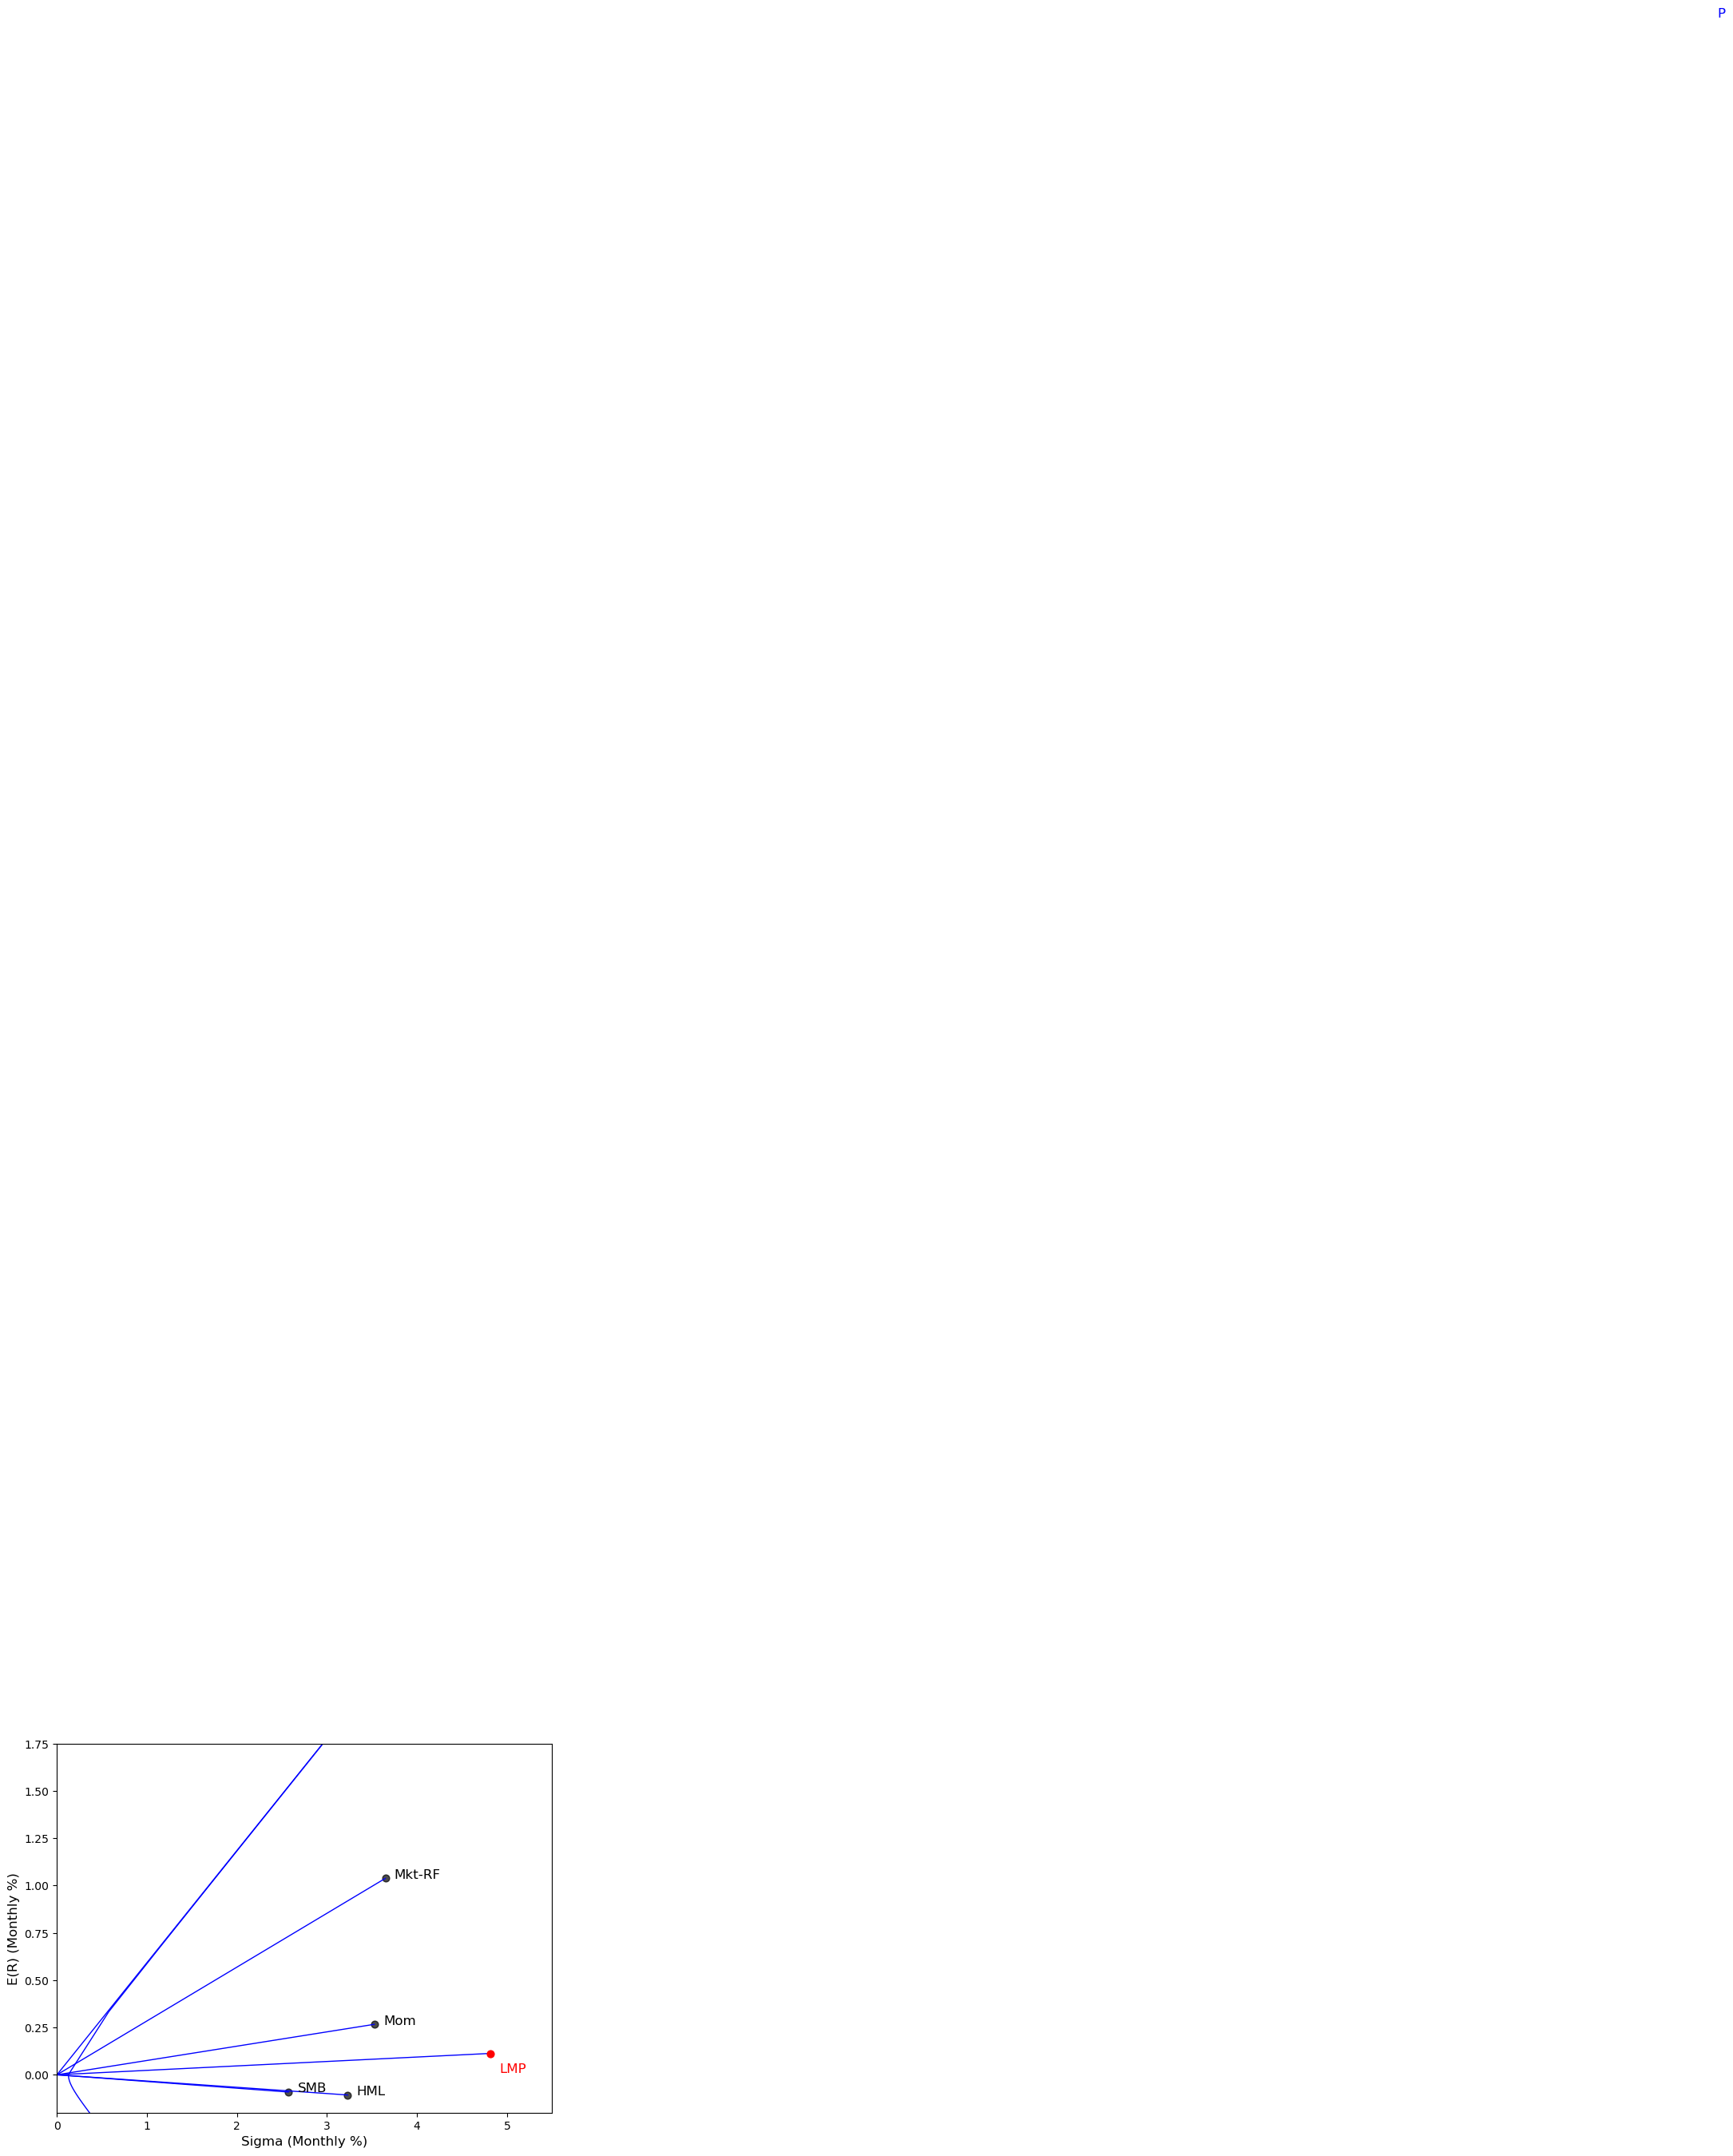

In [30]:
benchmark_name = ['SMALL LoBM', 'ME1 BM2', 'SMALL HiBM', 'BIG LoBM', 'ME2 BM2',
       'BIG HiBM', 'Mom']   # 7 benchmark

# 计算 FMP 收益率
LevFac_LMP,beta = construct_fmp(merged_data_OOS, benchmark_name, factor_name='LevFac')
plot_figure_6(merged_data_OOS, LevFac_LMP, scale='quarter_to_month', fig_name='OOS_FMP')

Using current data, the LMP is located inside the efficient frontier constructed by the 10 benchmark assets. This suggests that the leverage factor, constructed with revised data, fails to span the mean-variance efficient frontier as effectively as claimed in the original study.